In [1]:
# Chargement des packages nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importation des données

On importe les données de 2020 à 2022

In [3]:
# Année 2022
df_carac_2022 = pd.read_csv("../data/caracteristiques_2022.csv", sep=';', low_memory=False)
df_lieux_2022 = pd.read_csv("../data/lieux_2022.csv", sep=';', low_memory=False)
df_usagers_2022 = pd.read_csv("../data/usagers_2022.csv", sep=';', low_memory=False)
df_vehicules_2022 = pd.read_csv("../data/vehicules_2022.csv", sep=';', low_memory=False)

# Année 2021
df_carac_2021 = pd.read_csv("../data/caracteristiques_2021.csv", sep=';', low_memory=False)
df_lieux_2021 = pd.read_csv("../data/lieux_2021.csv", sep=';', low_memory=False)
df_usagers_2021 = pd.read_csv("../data/usagers_2021.csv", sep=';', low_memory=False)
df_vehicules_2021 = pd.read_csv("../data/vehicules_2021.csv", sep=';', low_memory=False)

# Année 2020
df_carac_2020 = pd.read_csv("../data/caracteristiques_2020.csv", sep=';', low_memory=False)
df_lieux_2020 = pd.read_csv("../data/lieux_2020.csv", sep=';', low_memory=False)
df_usagers_2020 = pd.read_csv("../data/usagers_2020.csv", sep=';', low_memory=False)
df_vehicules_2020 = pd.read_csv("../data/vehicules_2020.csv", sep=';', low_memory=False)


# Jointure

In [5]:
# On modifie le nom de la colonne de df_carac_2022

df_carac_2022.rename(columns={'Accident_Id': 'Num_Acc'}, inplace=True)

In [6]:
# On joint les df par années

df_merged_2022_1 = pd.merge(df_usagers_2022, df_vehicules_2022, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2022_2 = pd.merge(df_merged_2022_1, df_lieux_2022, on='Num_Acc')
df_merged_2022 = pd.merge(df_merged_2022_2, df_carac_2022, on='Num_Acc')

In [7]:
# On fait de même avec les autres années

df_merged_2021_1 = pd.merge(df_usagers_2021, df_vehicules_2021, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2021_2 = pd.merge(df_merged_2021_1, df_lieux_2021, on='Num_Acc')
df_merged_2021 = pd.merge(df_merged_2021_2, df_carac_2021, on='Num_Acc')

df_merged_2020_1 = pd.merge(df_usagers_2020, df_vehicules_2020, on=['Num_Acc', 'id_vehicule', 'num_veh'])
df_merged_2020_2 = pd.merge(df_merged_2020_1, df_lieux_2020, on='Num_Acc')
df_merged_2020 = pd.merge(df_merged_2020_2, df_carac_2020, on='Num_Acc')

In [8]:
# On concat le tout dans un seul df

df_merged = pd.concat([df_merged_2022, df_merged_2021, df_merged_2020], axis=0, ignore_index=True)

In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361205 entries, 0 to 361204
Data columns (total 55 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Num_Acc      361205 non-null  int64  
 1   id_usager    255910 non-null  object 
 2   id_vehicule  361205 non-null  object 
 3   num_veh      361205 non-null  object 
 4   place        361205 non-null  int64  
 5   catu         361205 non-null  int64  
 6   grav         361205 non-null  int64  
 7   sexe         361205 non-null  int64  
 8   an_nais      355264 non-null  float64
 9   trajet       361205 non-null  int64  
 10  secu1        361205 non-null  int64  
 11  secu2        361205 non-null  int64  
 12  secu3        361205 non-null  int64  
 13  locp         361205 non-null  int64  
 14  actp         361205 non-null  object 
 15  etatp        361205 non-null  int64  
 16  senc         361205 non-null  int64  
 17  catv         361205 non-null  int64  
 18  obs          361205 non-

## Pré-traitement

Observations dupliquées ?

In [12]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 63


In [13]:
# On supprime les lignes dupliquées

df_merged = df_merged.drop_duplicates(keep = 'first')

In [14]:
print('Nombre de lignes dupliquées :', df_merged.duplicated().sum())

Nombre de lignes dupliquées : 0


Les variables peuvent prendre la valeur de '-1' qui signifie 'Non renseigné'. Pour mieux gérer le nettoyage du df, on remplace cette valeur par un NaN.


In [16]:
df_merged = df_merged.replace(-1, np.nan)
df_merged = df_merged.replace('-1', np.nan)  # Si format txt
df_merged = df_merged.replace(' -1', np.nan)  # Si format txt

Visualisation des taux de NaN par variable

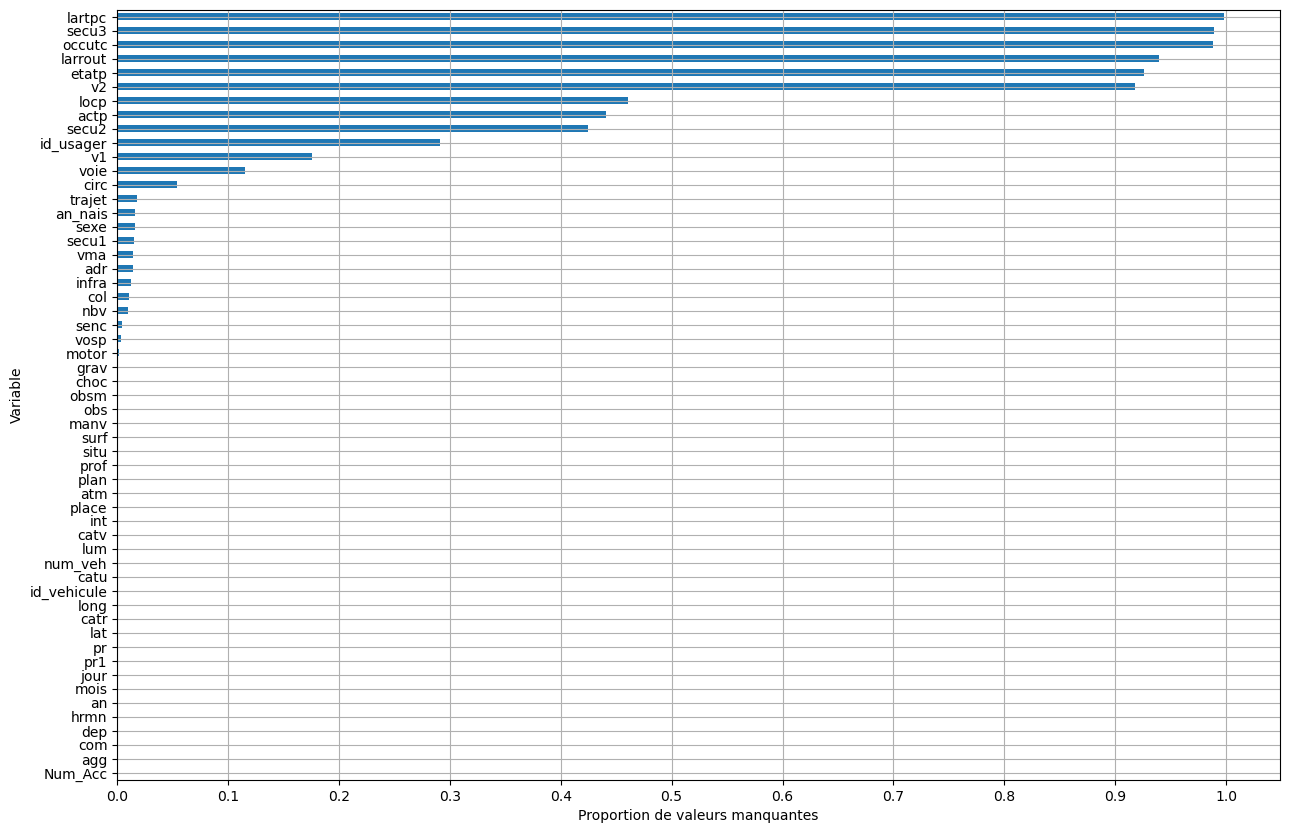

In [18]:
nan_col = df_merged.isna().sum().sort_values(ascending=True)/df_merged.shape[0]
nan_col.plot.barh(figsize=(15,10))  # On trace via pandas
plt.xticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid(True)
plt.xlabel('Proportion de valeurs manquantes')
plt.ylabel('Variable')
plt.show();

Les variables suivantes ont des taux de NaN supérieurs à 10% :
- lartpc : largeur du TPC si existe
- secu3 : Présence et utilisation d'un équipeemnt de sécurité (3eme renseignement possible)
- occutc : Nb d'occupants dans le transport en commun
- larrout : Largeur de la chaussée
- etatp : Si piéton accidenté accompagné ou non
- v2 : Lettre indice alphanum de la route
- locp : Localisation du piéton
- actp : Action du piéton
- secu2 : Présence et utilisation d'un équipeemnt de sécurité (2eme renseignement possible)
- id_usager : Identifiant unique de l'usager (que depuis 2021)
- v1 : Indice num du numéro de route
- voie : Numéro de la route

Au vu du nombre important de NaN, ces variables ne seront pas analysées (gestion des NaN peu envisageable). Nous faisons cependant l'exception pour les équipements de sécurité. Ils seront regroupés dans des variables pour chaque élément.

3 variables concernant les piétons sont également non utilisables. Pour la suite, on retirera également les autres variables en lien avec des piétons (catu = 3 (Piéton))

Pour la localisation des accidents, du fait d'avoir les latitudes et longitudes, nous pouvons supprimer les autres variables. Nous gardons tout de même la variable dep (département) et com (commune).

In [21]:
df_merged = df_merged.drop(['lartpc', 'occutc', 'larrout', 'etatp', 'locp', 'actp', 'id_usager',
                            'voie', 'v1', 'v2', 'adr', 'pr', 'pr1'], axis=1)

df_merged = df_merged[df_merged["catu"] != 3]

On trie les variables 'secu', 'secu2' et 'secu3'

In [23]:
df_merged['Ceinture'] = df_merged[['secu1', 'secu2', 'secu3']].isin([1]).any(axis=1)
df_merged['Casque'] = df_merged[['secu1', 'secu2', 'secu3']].isin([2]).any(axis=1)
df_merged['Dispositif enfants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([3]).any(axis=1)
df_merged['Gilet réfléchissant'] = df_merged[['secu1', 'secu2', 'secu3']].isin([4]).any(axis=1)
df_merged['Airbag'] = df_merged[['secu1', 'secu2', 'secu3']].isin([5, 7]).any(axis=1)
df_merged['Gants'] = df_merged[['secu1', 'secu2', 'secu3']].isin([6, 7]).any(axis=1)
df_merged['Autre equipement'] = df_merged[['secu1', 'secu2', 'secu3']].isin([9]).any(axis=1)

df_merged = df_merged.drop(['secu1', 'secu2', 'secu3'], axis=1)

On enlève les limitations de vitesse > à 130 km/h

In [25]:
df_merged.loc[df_merged['vma'] > 130, 'vma'] = np.nan

On convertit dans le bon format les latitudes et longitudes

In [27]:
df_merged['lat'] = df_merged['lat'].str.replace(',', '.').astype(float)
df_merged['long'] = df_merged['long'].str.replace(',', '.').astype(float)

On ne garde pas les victimes trop vieilles

In [29]:
df_merged = df_merged[df_merged["an_nais"] >= 1920]

In [30]:
# On convertit le df pour avoir des dates exploitables

df_merged['date'] = df_merged['jour'].astype(str) + '-' + df_merged['mois'].astype(str) + '-' + df_merged['an'].astype(str) + '-' 
df_merged['date'] = pd.to_datetime(df_merged['date'], dayfirst=True)


In [31]:
# On crée une variable région

region = pd.read_csv("../data/departements-region.csv")
region = region.rename(columns={'num_dep': 'dep'})

df_merged = df_merged.merge(region, how='left', on='dep')

### Traitement de la donnée en vue de la modélisation
Ce regroupement se base sur les observations faites lors de la data visualisation

In [33]:
# On crée une variable heure

df_merged['hrmn'] = df_merged['hrmn'].str.replace(':', '')
df_merged['heure'] = df_merged['hrmn'].astype(int)//100

# On supprime la variable initiale
df_merged = df_merged.drop(['hrmn'], axis=1)


In [34]:
# Variable place : place dans le véhicule

# Modalité : 1 à 9
# On regroupe en 3 catégories : conducteur, passager avant, passager arrière
df_merged['place'] = df_merged['place'].astype(int)

df_merged['conducteur'] = df_merged['place'].apply(lambda x: 1 if x==1 else 0)
df_merged['passager_avant'] = df_merged['place'].apply(lambda x: 1 if x in [2, 6] else 0)
df_merged['passager_arrière'] = df_merged['place'].apply(lambda x: 1 if x not in [1, 2, 6] else 0)

# On supprime la variable initiale
df_merged = df_merged.drop(['place'], axis=1)


In [35]:
# Variable catu : conducteur ou passager

# Modalité 1 (conducteur) ou 2 (passager)
# Le nombre d'occurence entre conducteur ou passager n'est pas cohérent avec celui de la variable place
# (263561 conducteurs contre 263915 pour variable catu)
# On garde la variable place car plus précise

df_merged = df_merged.drop(['catu'], axis=1)


In [36]:
# Variable grav : gravité de l'accident

# Modalité : 'Indemne' (1), 'Tué' (2), 'Blessé hospitalisé' (3), 'Blessé léger' (4)
# Variable cible
# On supprime le seul NaN présent

df_merged = df_merged.dropna(subset=['grav'])
df_merged['grav'] = df_merged['grav'].astype(int)


In [37]:
# Variable sexe : sexe de l'usager

# Modalité : Masculin' (1), 'Féminin' (2)
# Nb NaN : 4, on remplace par le mode

df_merged['sexe'] = df_merged['sexe'].fillna(df_merged['sexe'].mode()[0])
df_merged['sexe'] = df_merged['sexe'].astype(int)


In [38]:
# Variable an_nais : année de naissance de l'usager

# On tranforme cette variable pour connaître l'âge de l'usager
df_merged['an_nais'] = df_merged['an_nais'].astype(int)

df_merged['age'] = df_merged['an'] - df_merged['an_nais']


In [39]:
# Variable trajet : motif du trajet

# Modalité : 5.  9.  4.  0. nan  2.  3.  1.
# Nb NaN : 503, on remplace par le mode

df_merged['trajet'] = df_merged['trajet'].replace(0, np.nan)
df_merged['trajet'] = df_merged['trajet'].fillna(df_merged['trajet'].mode()[0])
df_merged['trajet'] = df_merged['trajet'].astype(int)

# On regroupe en 3 catégorie : autre, pro ou perso
df_merged['trajet_pro'] = df_merged['trajet'].apply(lambda x: 1 if x in [1, 4] else 0)
df_merged['trajet_perso'] = df_merged['trajet'].apply(lambda x: 1 if x in [2, 3, 5] else 0)
df_merged['trajet_autre'] = df_merged['trajet'].apply(lambda x: 1 if x==9 else 0)

df_merged = df_merged.drop(['trajet'], axis=1)


In [40]:
# Variable senc : sens de circulation

# Modalité : 0 1 2 3
# Nb NaN : 1376, on les place dans la catégorie inconnu

df_merged['senc'] = df_merged['senc'].fillna(0)
df_merged['senc'] = df_merged['senc'].astype(int)


In [41]:
# Variable catv : categorie du vehicule

# Modalité : nombreuse
# Nb NaN : 3, on les place dans le mode

df_merged['catv'] = df_merged['catv'].fillna(0)
df_merged['catv'] = df_merged['catv'].astype(int)

# On regroupe en sous-catégorie
df_merged['catv_velo'] = df_merged['catv'].apply(lambda x: 1 if x in [1,80] else 0)
df_merged['catv_moto'] = df_merged['catv'].apply(lambda x: 1 if x in [2,4,5,30,31,32,33,34] else 0)
df_merged['catv_voiture'] = df_merged['catv'].apply(lambda x: 1 if x in [7] else 0)
df_merged['catv_utilitaire'] = df_merged['catv'].apply(lambda x: 1 if x in [10] else 0)
df_merged['catv_veh_remorque'] = df_merged['catv'].apply(lambda x: 1 if x in [8,9,11,12] else 0)
df_merged['catv_PL'] = df_merged['catv'].apply(lambda x: 1 if x in [13,14,15] else 0)
df_merged['catv_tracteur'] = df_merged['catv'].apply(lambda x: 1 if x in [16,17,21] else 0)
df_merged['catv_tram_train'] = df_merged['catv'].apply(lambda x: 1 if x in [19,39,40] else 0)
df_merged['catv_quad_3roues'] = df_merged['catv'].apply(lambda x: 1 if x in [135,36,41,42,43] else 0)
df_merged['catv_autre_inconnu'] = df_merged['catv'].apply(lambda x: 1 if x in [0,3,6,18,20,99] else 0)
df_merged['catv_bus_car'] = df_merged['catv'].apply(lambda x: 1 if x in [37,38] else 0)
df_merged['catv_EDP'] = df_merged['catv'].apply(lambda x: 1 if x in [50,60] else 0)

df_merged = df_merged.drop(['catv'], axis=1)


In [42]:
# Variable obs : obstacle heurté

# Modalité : nombreuse
# Nb NaN : 94, on les place dans le mode

df_merged['obs'] = df_merged['obs'].fillna(df_merged['obs'].mode()[0])
df_merged['obs'] = df_merged['obs'].astype(int)


In [43]:
# Variable obsm : obstacle mobile heurté

# Modalité : nombreuse
# Nb NaN : 129, on les place dans le mode

df_merged['obsm'] = df_merged['obsm'].fillna(df_merged['obsm'].mode()[0])
df_merged['obsm'] = df_merged['obsm'].astype(int)


In [44]:
# Variable choc : point de choc

# Modalité : 0 à 9
# Nb NaN : 118, on les place dans le mode

df_merged['choc'] = df_merged['choc'].fillna(df_merged['choc'].mode()[0])
df_merged['choc'] = df_merged['choc'].astype(int)

# On regroupe en sous-catégorie
df_merged['choc_avant'] = df_merged['choc'].apply(lambda x: 1 if x in [1,2,3] else 0)
df_merged['choc_arriere'] = df_merged['choc'].apply(lambda x: 1 if x in [4,5,6] else 0)
df_merged['choc_cote'] = df_merged['choc'].apply(lambda x: 1 if x in [7,8] else 0)
df_merged['choc_tonneaux'] = df_merged['choc'].apply(lambda x: 1 if x in [9] else 0)
df_merged['choc_aucun'] = df_merged['choc'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['choc'], axis=1)


In [45]:
# Variable manv : manoeuvre lors de l'accident

# Modalité : nombreuse
# Nb NaN : 79, on les place dans le mode

df_merged['manv'] = df_merged['manv'].fillna(df_merged['manv'].mode()[0])
df_merged['manv'] = df_merged['manv'].astype(int)

# On regroupe en sous-catégorie
df_merged['manv_diverse'] = df_merged['manv'].apply(lambda x: 1 if x in [3,4,5,6,7,8,9,10,19,20,21,22,23,24,25,26] else 0)
df_merged['manv_droite'] = df_merged['manv'].apply(lambda x: 1 if x in [12,14,16,18] else 0)
df_merged['manv_gauche'] = df_merged['manv'].apply(lambda x: 1 if x in [11,13,15,17] else 0)
df_merged['manv_pas_chang_dir'] = df_merged['manv'].apply(lambda x: 1 if x in [1] else 0)
df_merged['manv_meme_sens_file'] = df_merged['manv'].apply(lambda x: 1 if x in [2] else 0)
df_merged['manv_inconnue'] = df_merged['manv'].apply(lambda x: 1 if x in [0] else 0)

df_merged = df_merged.drop(['manv'], axis=1)


In [46]:
# Variable motor : type de moteur

# Modalité : 0 à 6
# Nb NaN : 420

df_merged['motor'] = df_merged['motor'].fillna(0)
df_merged['motor'] = df_merged['motor'].astype(int)


In [47]:
# Variable catr : type de route

# Modalité : 1 à 7, 9
# Nb NaN : 0

df_merged['catr'] = df_merged['catr'].astype(int)


In [48]:
# Variable circ : régime de circulation

# Modalité : 1 à 4
# Nb NaN : 16866 (5% de NaN) -> on essaie de réduire le nb NaN via d'autre variables

# On regroupe en une catégorie : bidirectionnelle ou non

df_merged['circ'] = df_merged['circ'].fillna(df_merged['circ'].mode()[0])
df_merged['chaussee_bidirectionnelle'] = df_merged['circ'].apply(lambda x: 1 if x == 2 else 0)

df_merged['circ'] = df_merged['circ'].astype(int)
df_merged = df_merged.drop(['circ'], axis=1)


In [49]:
# Variable nbv : nombre de voies

# Modalité : 0 à 12
# Nb NaN : 2624

df_merged['nbv'] = df_merged['nbv'].replace('#ERREUR', np.nan)
df_merged['nbv'] = df_merged['nbv'].fillna(df_merged['nbv'].mode()[0])
df_merged['nbv'] = df_merged['nbv'].astype(int)


In [50]:
# Variable vosp : présence d'une voie réservée

# Modalité : 0 à 3
# Nb NaN : 1232

df_merged['vosp'] = df_merged['vosp'].fillna(df_merged['vosp'].mode()[0])
df_merged['voie_reservee'] = df_merged['vosp'].apply(lambda x: 0 if x == 0 else 1)

df_merged = df_merged.drop(['vosp'], axis=1)


In [51]:
# Variable prof : profil en long

# Modalité : 1 à 4
# Nb NaN : 44

df_merged['prof'] = df_merged['prof'].fillna(df_merged['prof'].mode()[0])
df_merged['prof'] = df_merged['prof'].astype(int)


In [52]:
# Variable plan : tracé en plan

# Modalité : 1 à 4
# Nb NaN : 39

df_merged['plan'] = df_merged['plan'].fillna(df_merged['plan'].mode()[0])
df_merged['plan'] = df_merged['plan'].astype(int)


In [53]:
# Variable surf : état de la chaussée

# Modalité : 1 à 9
# Nb NaN : 58

df_merged['surf'] = df_merged['surf'].fillna(df_merged['surf'].mode()[0])
df_merged['surf'] = df_merged['surf'].astype(int)

# On regroupe en une catégorie : chaussée sèche ou non
df_merged['chaussee_seche'] = df_merged['surf'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['surf'], axis=1)


In [54]:
# Variable infra : présence d'un aménagement

# Modalité : 0 à 9
# Nb NaN : 3774

df_merged['infra'] = df_merged['infra'].fillna(df_merged['infra'].mode()[0])
df_merged['infra'] = df_merged['infra'].astype(int)


In [55]:
# Variable situ : situation de l'accident

# Modalité : 1 à 8
# Nb NaN : 42

df_merged['situ'] = df_merged['situ'].fillna(df_merged['situ'].mode()[0])
df_merged['situ'] = df_merged['situ'].astype(int)


In [56]:
# Variable vma : vitesse maximale autorisée

# Modalité : nombreuses
# Nb NaN : 4907

df_merged['vma'] = df_merged['vma'].fillna(df_merged['vma'].mode()[0])
df_merged['vma'] = df_merged['vma'].astype(int)

# On regroupe en sous catégorie
df_merged['vma'] = df_merged['vma'].apply(lambda x: 30 if x<=30. else x)


In [57]:
# Variable lum : luminosité

# Modalité : 1 à 5
# Nb NaN : 7

df_merged['lum'] = df_merged['lum'].fillna(df_merged['lum'].mode()[0])
df_merged['lum'] = df_merged['lum'].astype(int)


In [58]:
# Variable agg : si en agglomération

# Modalité : 1, 2
# Nb NaN : 0

df_merged['agg'] = df_merged['agg'].astype(int)


In [59]:
# Variable int : si intersection

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['int'] = df_merged['int'].fillna(df_merged['int'].mode()[0])
df_merged['int'] = df_merged['int'].astype(int)

# On regroupe en sous-catégorie
df_merged['int_aucune'] = df_merged['int'].apply(lambda x: 1 if x in [1] else 0)
df_merged['int_branches'] = df_merged['int'].apply(lambda x: 1 if x in [2,3,4,5] else 0)
df_merged['int_autre'] = df_merged['int'].apply(lambda x: 1 if x in [6,7,8,9] else 0)

df_merged = df_merged.drop(['int'], axis=1)


In [60]:
# Variable atm : condition atmo

# Modalité : 1 à 9
# Nb NaN : 19

df_merged['atm'] = df_merged['atm'].fillna(df_merged['atm'].mode()[0])
df_merged['atm'] = df_merged['atm'].astype(int)

# On regroupe en une catégorie : cbeau temps ou non
df_merged['atm_normal'] = df_merged['atm'].apply(lambda x: 1 if x == 1 else 0)

df_merged = df_merged.drop(['atm'], axis=1)


In [61]:
# Variable col : type de collision

# Modalité : 1 à 7
# Nb NaN : 3646

df_merged['col'] = df_merged['col'].fillna(df_merged['col'].mode()[0])
df_merged['col'] = df_merged['col'].astype(int)


In [62]:
# Variables équipement

for item in ['Ceinture', 'Casque', 'Dispositif enfants', 'Gilet réfléchissant', 'Airbag', 'Gants', 'Autre equipement']:
    df_merged[item] = df_merged[item].apply(lambda x: 1 if x else 0)


In [63]:
df_merged_2 = df_merged.drop(['Num_Acc', 'id_vehicule', 'num_veh', 'dep', 'com', 'date', 'dep_name', 'region_name'], axis=1)

In [64]:
num_features = ['heure', 'an_nais', 'age', 'nbv', 'vma', 'lat', 'long', 'jour', 'mois', 'an']
to_cat_features = ['senc', 'obs', 'obsm', 'motor', 'catr', 'prof', 'plan', 'infra', 'situ', 'lum', 'col']


In [65]:
df_cat = df_merged_2.drop(num_features, axis=1)

In [66]:
X = df_cat.drop('grav', axis=1)
y = df_cat['grav']

In [67]:
X = pd.get_dummies(X, columns=to_cat_features, drop_first=True)

### Split du jeu de données

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XGBoost

Algorithmes de gradient boosting
Même principe que pour RandomForest mais avec construction des arbres l'un après l'autre (dépendance entre eux)
et combine les résultats au fur et à mesure

Attention : algorithme très sensible aux profondeurs des arbres

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_boost = GradientBoostingClassifier(loss="log_loss",
                                         learning_rate=0.2,
                                         max_depth=5,
                                         max_features="sqrt",
                                         subsample=0.95,
                                         n_estimators=200)
model_boost.fit(X_train, y_train)

# Mesure performance modèle
print('Score test :', model_boost.score(X_test, y_test))
print('Score train :', model_boost.score(X_train, y_train))

In [ ]:
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_boost = model_boost.predict(X_test)
y_pred_boost_train = model_boost.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost))
print('Accuracy score train :', accuracy_score(y_train, y_pred_boost_train))
print('Recall test :', recall_score(y_test, y_pred_boost, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred_boost, average='macro'))

conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)

display(pd.crosstab(y_test, y_pred_boost, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_boost))

sns.heatmap(conf_matrix_boost, annot=True, fmt='d', cbar=False,
            xticklabels=model_boost.classes_,
            yticklabels=model_boost.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

## Interprétabilité du modèle

L'interprétabilité = la mesure dans laquelle un être humain peut prédire de manière cohérente le résultat d'un modèle.

Plus l'interprétabilité d'un modèle de Machine Learning est élevée, plus il est facile pour un individu de comprendre le raisonnement derrière certaines décisions ou prédictions. Un modèle est plus facilement interprétable qu'un autre si ses décisions sont plus faciles à comprendre pour un humain.

Les mesures de performances sont importantes, mais elles n'expliquent pas les décisions prédictives d'un modèle. Au fil du temps, les performances peuvent diminuer car le modèle n'est plus optimal par rapport à divers changements de distribution des variables explicatives. Il est donc important de comprendre ce qui pousse un modèle à prendre certaines décisions afin d'identifier les features auxquels un modèle serait très sensible et dont il faut surveiller la distribution au fil du temps.

Parfois un modèle peut réaliser de bonnes performances, mais après déploiement, on peut se rendre compte qu'il ne correspond pas à ce qu'on attendait. Il peut avoir une différence d'interprétation entre ce qu'on demande au modèle et sa compréhension de notre formaulation.

Les **trois aspects** les plus importants de l'interprétation des modèles sont expliqués par les questions suivantes:

**Qu'est-ce qui motive les prédictions du modèle ?** Interroger notre modèle et découvrir les interactions cachées entre les différentes features pour avoir une idée de celles qui pourraient être les plus importantes dans les prises de décisions du modèle. Cela permet de <ins>garantir l'équité du modèle</ins>.

**Pourquoi le modèle a-t-il pris une certaine décision ?** Valider et de justifier pourquoi certaines caractéristiques clés ont été à l'origine de certaines décisions prises par un modèle lors des prédictions. Cela permet de <ins>garantir la responsabilité et la fiabilité du modèle</ins>.

**Comment pouvons-nous faire confiance aux prédictions du modèle ?** Evaluer et valider la façon dont un modèle prend des décisions pour tout point de données. Ainsi, on peut démontrer et expliquer facilement que le modèle fonctionne comme prévu. Cela permet de <ins>garantir la transparence du modèle</ins>.


Deux types d'interprétabilité : l'interprétabilité ***intrinsèque*** et l'interprétabilité ***post hoc***.

**Interprétabilité intrinsèque :** Propre aux modèles eux-mêmes et découle de leur structure simple et transparente. Des exemples incluent les régressions linéaires (où les coefficients sont directement interprétables), les arbres de décision (où l'on peut suivre les branches pour comprendre les décisions), et les modèles basés sur des règles. Ces modèles sont conçus pour être compréhensibles par les humains sans nécessiter de méthodes d'analyse supplémentaires.

**Interprétabilité post hoc :** Pour les modèles complexes, qui ne sont pas naturellement transparents, et nécessite des techniques supplémentaires pour expliquer leurs prédictions après coup. Les méthodes post hoc incluent LIME (qui génère des explications locales en ajustant des modèles simples autour d'une instance spécifique) et ***SHAP (qui utilise des concepts de théorie des jeux pour attribuer à chaque feature une valeur d'importance)***. Ces techniques peuvent être appliquées à n'importe quel modèle de machine learning sans se baser sur la structure interne du modèle.


In [ ]:
# Importation des package nécessaire
import shap

In [ ]:
# Représentation du résultats des accidents suivant l'ensemble d'entrainement
y_train.value_counts()
print('Indenmes = ', y_train.value_counts()[1], ' soit ', np.round(y_train.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_train.value_counts()[4], ' soit ', np.round(y_train.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_train.value_counts()[3], ' soit ', np.round(y_train.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_train.value_counts()[2], ' soit ', np.round(y_train.value_counts(normalize=True)[2]*100, 1), '%')

In [ ]:
# Représentation du résultats des accidents suivant l'ensemble de test
y_test.value_counts()
print('Indenmes = ', y_test.value_counts()[1], ' soit ', np.round(y_test.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_test.value_counts()[4], ' soit ', np.round(y_test.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_test.value_counts()[3], ' soit ', np.round(y_test.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_test.value_counts()[2], ' soit ', np.round(y_test.value_counts(normalize=True)[2]*100, 1), '%')

#### Interprétation globale du modèle

In [ ]:
# Analyse des valeurs shap
#explainer = shap.TreeExplainer(model_boost)

#shap_values = explainer.shap_values(X_test)

# NE fonctionne plus pour XGBoost :
#InvalidModelError: GradientBoostingClassifier is only supported for binary classification right now!

In [ ]:
explainer_boost = shap.KernelExplainer(model_boost.predict_proba, X_train[:100])
shap_values_boost = explainer_boost.shap_values(X_test[:100])

In [ ]:
# On remanie les dimensions des shap_values
shap_values_boost = [shap_values_boost[:,:,i] for i in range(4)]

In [ ]:
# On vérifie le shape pour chacune de nos classes
shap_values_boost[0].shape, shap_values_boost[1].shape, shap_values_boost[2].shape, shap_values_boost[3].shape, 

In [ ]:
print(f"Valeur Shapley de Référence moyenne par Classe : {explainer_boost.expected_value}")

In [ ]:
# visualisation de l'impact de chaque variables sur la prédiction
shap.summary_plot(shap_values_boost,
                  X_test2,
                  plot_type="bar",
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.show();

In [ ]:
# Même graphique mais en ne sélectionnant que les variables les plus impactantes
shap.summary_plot(shap_values_boost,
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(10, 5),
                  plot_type="bar",
                  max_display=13,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.03", 
          fontsize=16, fontstyle='italic')
plt.show();

In [ ]:
importances = model_boost.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Feature Importances')
plt.show();

In [ ]:
# Modifie numérotation des classes à prédire pour que fonctionne le xgb (Expected: [0 1 2 3], got [1 2 3 4])
y_train3 = y_train.replace({1:0, 2:1, 3:2, 4:3})
y_test3 = y_test.replace({1:0, 2:1, 3:2, 4:3})

import xgboost as xgb

model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train3)

In [ ]:
explainer_xgb = shap.TreeExplainer(model_xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test[:10000])

In [ ]:
# On remanie les dimensions des shap_values
shap_values_xgb = [shap_values_xgb[:,:,i] for i in range(4)]

In [ ]:
# On vérifie le shape pour chacune de nos classes
shap_values_xgb[0].shape, shap_values_xgb[1].shape, shap_values_xgb[2].shape, shap_values_xgb[3].shape, 

In [ ]:
print(f"Valeur Shapley de Référence moyenne par Classe : {explainer_xgb.expected_value}")

In [ ]:
# visualisation de l'impact de chaque variables sur la prédiction
shap.summary_plot(shap_values_xgb,
                  X_test2,
                  plot_type="bar",
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.show();

In [ ]:
# Même graphique mais en ne sélectionnant que les variables les plus impactantes
shap.summary_plot(shap_values_xgb,
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(10, 5),
                  plot_type="bar",
                  max_display=13,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.03", 
          fontsize=16, fontstyle='italic')
plt.show();

On teste avec randomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=30, 
                               max_depth=20, 
                               random_state=42)
model.fit(X_train, y_train)

# Mesure performance modèle
print('Score test :', model.score(X_test, y_test))
print('Score train :', model.score(X_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred))
print('Accuracy score train :', accuracy_score(y_train, y_pred_train))
print('Recall test :', recall_score(y_test, y_pred, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred, average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred)

display(pd.crosstab(y_test, y_pred, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

In [ ]:
# Représentation du résultats des accidents suivant l'ensemble d'entrainement
y_train.value_counts()
print('Indenmes = ', y_train.value_counts()[1], ' soit ', np.round(y_train.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_train.value_counts()[4], ' soit ', np.round(y_train.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_train.value_counts()[3], ' soit ', np.round(y_train.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_train.value_counts()[2], ' soit ', np.round(y_train.value_counts(normalize=True)[2]*100, 1), '%')

In [ ]:
# Représentation du résultats des accidents suivant l'ensemble de test
y_test.value_counts()
print('Indenmes = ', y_test.value_counts()[1], ' soit ', np.round(y_test.value_counts(normalize=True)[1]*100, 1), '%')
print('Blessé léger = ', y_test.value_counts()[4], ' soit ', np.round(y_test.value_counts(normalize=True)[4]*100, 1), '%')
print('Blessé grave = ', y_test.value_counts()[3], ' soit ', np.round(y_test.value_counts(normalize=True)[3]*100, 1), '%')
print('Tué = ', y_test.value_counts()[2], ' soit ', np.round(y_test.value_counts(normalize=True)[2]*100, 1), '%')

In [ ]:
# Analyse des valeurs shap
explainer = shap.TreeExplainer(model)


In [ ]:
# Faire tourner shap.values sur tout le jeu X_test prend énormément de temps (au moins plus de 6h).
# Pour programmer les lignes de code dans un premier temps, on réduit l'échantillon.
X_test2 = X_test[:100]

In [ ]:
# On calcule les shap_values de chaque valeur du jeu X_test réduit (c'est cette partie qui prend du temps)
shap_values = explainer.shap_values(X_test2, check_additivity=False)

In [ ]:
shap_values.shape
# On voit que nous avons bien nos 100 lignes, 115 variables et nos 4 classes

In [ ]:
#On reshape la variable car sinon on ne pourra pas appliquer le reste des fonctions
# la fonstion shap_values a inversé les différents shapes dans le cadre de ce modèle multi-classes
shap_values = [shap_values[:,:,i] for i in range(4)]

In [ ]:
# On crée deux variables pour identifier le nom de nos features et de nos classes
feature_names = X_test2.columns.to_list()
target_names = ["indemne", "tué", "blessé_hospitalisé", "blessé_léger"]
print(feature_names)

In [ ]:
# On vérifie le shape pour chacune de nos classes
shap_values[0].shape, shap_values[1].shape, shap_values[2].shape, shap_values[3].shape, 

In [ ]:
print(f"Valeur Shapley de Référence moyenne par Classe : {explainer.expected_value}")

In [ ]:
# visualisation de l'impact de chaque variables sur la prédiction
shap.summary_plot(shap_values,
                  X_test2,
                  plot_type="bar",
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables", fontsize=20, fontstyle='italic')
plt.show();

In [ ]:
# Même graphique mais en ne sélectionnant que les variables les plus impactantes
shap.summary_plot(shap_values,
                  class_names= target_names,
                  feature_names=feature_names,
                  plot_size=(10, 5),
                  plot_type="bar",
                  max_display=13,
                  show = False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables\nMoyenne des valeurs absolues des valeurs de Shap >= 0.03", 
          fontsize=16, fontstyle='italic')
plt.show();

In [ ]:
# Transformer les contributions marginales en un objet shap.Explanation pour pouvoir tracer un autre plot bar
class_of_interest = 0  # On choisit une classe
shap_explanation = shap.Explanation(values=shap_values[class_of_interest],
                                    data=X_test2,
                                    feature_names=X_test2.columns.tolist())

# On utilise l'objet Explanation pour le graphique
fig = plt.figure(figsize=(16, 10))
shap.plots.bar(shap_explanation, max_display=30, show=False)
plt.title("Interprétation Globale : Diagramme d'Importance des Variables pour une classe\nAutre Représentation Graphique", 
          fontsize=24, fontstyle='italic')
plt.show();


In [ ]:
# On trace le même graphe pour les 4 classes 
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
for i in range(4):  # Supposons que vous avez 4 classes
    shap_explanation = shap.Explanation(values=shap_values[i],
                                        data=X_test2,
                                        feature_names=X_test2.columns.tolist())
    shap.plots.bar(shap_explanation, max_display=10, show=False, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f"Classe {i}")
plt.tight_layout()
plt.show();

In [ ]:
# print the JS visualization code to the notebook
# On trace un summary_plot pour une classe
shap.initjs()

shap.summary_plot(shap_values[0], 
                  features=X_test2,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=48,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP pour une classe\n", 
          fontsize=20, fontstyle='italic')
plt.show();

In [ ]:
# print the JS visualization code to the notebook
# Même graphe en ne sélectionnant que les 10 premières variables
shap.initjs()

shap.summary_plot(shap_values[0], 
                  features=X_test2,
                  feature_names=feature_names,
                  plot_size=(16, 12),
                  cmap='PiYG_r',
                  plot_type="dot",
                  max_display=10,
                  show = False)
plt.title("Interprétation Globale : Diagramme des valeurs SHAP pour une classe\n", 
          fontsize=20, fontstyle='italic')
plt.show();

In [ ]:
# On trace le graphe précédent pour nos 4 classes
shap.initjs()

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()  # Aplatir le tableau 2D en 1D pour faciliter l'indexation

for i in range(4):
    plt.sca(axs[i])  # Définir l'axe courant
    shap.summary_plot(shap_values[i], 
                      features=X_test2,
                      feature_names=feature_names,
                      plot_size=(12, 10),
                      cmap='PiYG_r',
                      plot_type="dot",
                      max_display=10,
                      show=False)
    axs[i].set_title(f"Classe {i}")
plt.tight_layout()
plt.show();

In [ ]:
# On trace un graphe de dépendance pour une variable et une classe (exemple)
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
shap.dependence_plot("Ceinture", shap_values[0], X_test2, 
                     interaction_index=None, alpha = 0.5,
                     ax=ax1, show = False)
ax1.title.set_text("Graphique de dépendance" )

ax2 = fig.add_subplot(122)
shap.dependence_plot("Ceinture", shap_values[0], X_test2, 
                     interaction_index="auto", alpha = 0.5, 
                     ax=ax2, show = False)
ax2.title.set_text("Graphique de dépendance et intéraction" )

plt.show();

#### Interprétation locale du modèle

In [ ]:
# load JS visualization code to notebook
# On trace pour un usager son force plot
# Comme shap_values[idx] est un array à deux dimensions (100, 115), on obtient un stacked force plot pour la classe idx
shap.initjs()

idx = 2  # Classe sélectionnée

shap.force_plot(explainer.expected_value[idx], 
                shap_values[idx],
                #X_test2.iloc[idx,:],
                X_test2,
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0)

Le gstacked force plot est particulièrement utile pour examiner les cas mal classés et obtenir des informations sur les facteurs à l’origine de ces erreurs de classification. Cela permet une compréhension plus approfondie du processus de prise de décision du modèle et aide à identifier les domaines qui nécessitent une étude plus approfondie ou une amélioration.

Il reste cependant difficile à interpréter et nécessite donc beaucoup de temps de compréhension

In [ ]:
# On trace pour un usager son force plot en considérant une seule classe cette fois-ci (shap_values en 1D array)
shap.initjs()

idx = 2
print("Usager numero : ", X_test2.index[idx])
print("Model Prediction : Classe", y_pred[idx])
print("Classe Réelle de l'usager :", y_test.loc[idx])
print("__"*40)

shap.force_plot(explainer.expected_value[idx], 
                shap_values[0][idx],
                X_test2.iloc[idx,:],
                figsize=(20, 8),
                ordering_keys=True,
                text_rotation=0)

In [ ]:
# Créer le graphique waterfall_plot pour un usager et une classe

class_of_interest = 0  # On choisit une classe
idx = 2  # usager qu'on veut
shap_exp = shap.Explanation(values=shap_values[class_of_interest][idx],
                            base_values=explainer.expected_value[class_of_interest],
                            data=X_test2.iloc[idx,:],
                            feature_names=X_test2.columns.tolist())

shap.waterfall_plot(shap_exp, max_display=14)

In [ ]:
class_of_interest = 0  # On choisit une classe
idx = 2  # usager qu'on veut

shap.decision_plot(explainer.expected_value[class_of_interest], 
                   shap_values[class_of_interest][idx], 
                   X_test2.iloc[idx,:], 
                   feature_names=X_test2.columns.to_list(),
                   feature_order='importance',
                   feature_display_range=slice(None, -14, -1))


## Recherche meilleurs hyperparamètres

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Modifie numérotation des classes à prédire pour que fonctionne le xgb (Expected: [0 1 2 3], got [1 2 3 4])
y_train3 = y_train.replace({1:0, 2:1, 3:2, 4:3})
y_test3 = y_test.replace({1:0, 2:1, 3:2, 4:3})

# Définition des modèles
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Définition des grilles de paramètres pour GridSearch
param_grid_rf = {'n_estimators': [100, 200, 300],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

param_grid_xgb = {'n_estimators': [100, 200, 300],
                  'max_depth': [3, 4, 5],
                  'learning_rate': [0.01, 0.1, 0.3]}

param_grid_gb = {'n_estimators': [100, 200, 300],
                 'max_depth': [3, 4, 5],
                 'learning_rate': [0.01, 0.1, 0.3],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Définition des distributions de paramètres pour RandomSearch
param_dist_rf = {'n_estimators': np.arange(100, 1000, 100),
                 'max_depth': [None] + list(np.arange(10, 110, 10)),
                 'min_samples_split': np.arange(2, 21),
                 'min_samples_leaf': np.arange(1, 21)}

param_dist_xgb = {'n_estimators': np.arange(100, 1000, 100),
                  'max_depth': np.arange(3, 10),
                  'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]}

param_dist_gb = {'n_estimators': np.arange(100, 1000, 100),
                 'max_depth': np.arange(3, 10),
                 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                 'min_samples_split': np.arange(2, 21),
                 'min_samples_leaf': np.arange(1, 21)}

# Fonction pour effectuer la recherche d'hyperparamètres et retourner les meilleurs résultats
def perform_search(model, param_grid, param_dist, X_train, y_train, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    else:
        search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
    
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_

# Liste des modèles et leurs paramètres correspondants
models = [rf, xgb, gb]
param_grids = [param_grid_rf, param_grid_xgb, param_grid_gb]
param_dists = [param_dist_rf, param_dist_xgb, param_dist_gb]
model_names = ['RandomForest', 'XGBoost', 'GradientBoosting']

# Application de la fonction pour chaque modèle
for model, param_grid, param_dist, name in zip(models, param_grids, param_dists, model_names):
    print(f"\nOptimisation pour {name}:")
    
    # GridSearch
    #print("GridSearch:")
    #best_params_grid, best_score_grid = perform_search(model, param_grid, param_dist, X_train, y_train, search_type='grid')
    #print(f"Meilleurs paramètres: {best_params_grid}")
    #print(f"Meilleur score: {best_score_grid}")
    
    # RandomSearch
    print("\nRandomSearch:")
    print(model)
    if model == xgb:
        best_params_random, best_score_random = perform_search(model, param_grid, param_dist, X_train, y_train3, search_type='random')
    else:
        best_params_random, best_score_random = perform_search(model, param_grid, param_dist, X_train, y_train, search_type='random')
    print(f"Meilleurs paramètres: {best_params_random}")
    print(f"Meilleur score: {best_score_random}")
    
    # Comparaison des performances sur l'ensemble de test
    #model_grid = model.set_params(**best_params_grid)
    #model_grid.fit(X_train, y_train)
    #y_pred_grid = model_grid.predict(X_test)
    
    model_random = model.set_params(**best_params_random)
    if model == xgb:
        model_random.fit(X_train, y_train3)
    else:
        model_random.fit(X_train, y_train)
    y_pred_random = model_random.predict(X_test)
    
    print(f"\nPrécision sur l'ensemble de test:")
    #print(f"GridSearch: {accuracy_score(y_test, y_pred_grid)}")
    print(f"RandomSearch: {accuracy_score(y_test, y_pred_random)}")


In [125]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Définition des modèles
gb = GradientBoostingClassifier(random_state=42)

# Définition des distributions de paramètres pour RandomSearch
param_dist_gb = {'n_estimators': np.arange(100, 1000, 100),
                 'max_depth': np.arange(3, 10),
                 'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                 'min_samples_split': np.arange(2, 21),
                 'min_samples_leaf': np.arange(1, 21)}

# Fonction pour effectuer la recherche d'hyperparamètres et retourner les meilleurs résultats
def perform_search(model, param_dist, X_train, y_train, search_type='grid'):
    if search_type == 'grid':
        search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    else:
        search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
    
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_

# Liste des modèles et leurs paramètres correspondants
models = [gb]
param_dists = [param_dist_gb]
model_names = ['GradientBoosting']

# Application de la fonction pour chaque modèle
for model, param_dist, name in zip(models, param_dists, model_names):
    print(f"\nOptimisation pour {name}:")
    
    # RandomSearch
    print("\nRandomSearch:")
    print(model)
    best_params_random, best_score_random = perform_search(model, param_dist, X_train, y_train, search_type='random')
    print(f"Meilleurs paramètres: {best_params_random}")
    print(f"Meilleur score: {best_score_random}")
    
    model_random = model.set_params(**best_params_random)
    model_random.fit(X_train, y_train)
    y_pred_random = model_random.predict(X_test)
    
    print(f"\nPrécision sur l'ensemble de test:")
    print(f"RandomSearch: {accuracy_score(y_test, y_pred_random)}")



Optimisation pour GradientBoosting:

RandomSearch:
GradientBoostingClassifier(random_state=42)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 700, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_depth': 6, 'learning_rate': 0.05}
Meilleur score: 0.6597597260150307

Précision sur l'ensemble de test:
RandomSearch: 0.6611971025543271


Optimisation pour RandomForest:

RandomSearch:
RandomForestClassifier(random_state=42)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 500, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_depth': None}
Meilleur score: 0.6580288594857627

Précision sur l'ensemble de test:
RandomSearch: 0.6592603888677088

Optimisation pour XGBoost:

RandomSearch:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.3}
Meilleur score: 0.6601752933687327

Précision sur l'ensemble de test:
RandomSearch: 0.08132672512390393

Optimisation pour GradientBoosting:

RandomSearch:
GradientBoostingClassifier(random_state=42)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres: {'n_estimators': 700, 'min_samples_split': 11, 'min_samples_leaf': 18, 'max_depth': 6, 'learning_rate': 0.05}
Meilleur score: 0.6597597260150307

Précision sur l'ensemble de test:
RandomSearch: 0.6611971025543271

In [127]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

# Définir l'espace de recherche des hyperparamètres
param_dist = {
    'num_leaves': [20, 31, 50, 100],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300, 500],
    'min_child_samples': [5, 10, 20, 30],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

# Créer le modèle LGBMClassifier
lgbm = LGBMClassifier(random_state=42)

# Configurer et exécuter la recherche aléatoire
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,  # Nombre d'itérations
    cv=5,  # Validation croisée à 5 plis
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés:")
print(random_search.best_params_)

# Afficher le meilleur score
print("Meilleur score:", random_search.best_score_)

# Évaluer le modèle optimisé sur l'ensemble de test
best_model = random_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Score sur l'ensemble de test:", test_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.386677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 262297, number of used features: 114
[LightGBM] [Info] Start training from score -0.811827
[LightGBM] [Info] Start training from score -3.702456
[LightGBM] [Info] Start training from score -1.930760
[LightGBM] [Info] Start training from score -0.951263
Meilleurs hyperparamètres trouvés:
{'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
Meilleur score: 0.6607776580191809
Score sur l'ensemble de test: 0.6606

Fitting 5 folds for each of 10 candidates, totalling 50 fits  
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines  
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.386677 seconds.  
You can set `force_row_wise=true` to remove the overhead.  
And if memory is not enough, you can set `force_col_wise=true`.  
[LightGBM] [Info] Total Bins 230  
[LightGBM] [Info] Number of data points in the train set: 262297, number of used features: 114  
[LightGBM] [Info] Start training from score -0.811827  
[LightGBM] [Info] Start training from score -3.702456  
[LightGBM] [Info] Start training from score -1.930760  
[LightGBM] [Info] Start training from score -0.951263  
Meilleurs hyperparamètres trouvés:  
{'subsample': 0.6, 'reg_lambda': 0.5, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 1.0}  
Meilleur score: 0.6607776580191809  
Score sur l'ensemble de test: 0.6606023637056805

In [134]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Définition des modèles
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Définition des grilles de paramètres pour GridSearch
param_grid_rf = {'n_estimators': [30, 400, 500, 600],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [5, 11, 16],
                 'min_samples_leaf': [2, 5, 8]}

param_grid_gb = {'n_estimators': [200, 500, 700],
                 'max_depth': [4, 5, 6],
                 'learning_rate': [0.05, 0.1, 0.2],
                 'min_samples_split': [8, 11, 15],
                 'min_samples_leaf': [4, 10, 18]}

param_grid_lgbm = {'num_leaves': [20, 40, 50, 60],
                   'max_depth': [-1, 0, 1],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'n_estimators': [300, 500, 800],
                   'min_child_samples': [5, 10, 15],
                   'subsample': [0.4, 0.6, 0.8],
                   'colsample_bytree': [0.8, 1.0, 1.2],
                   'reg_alpha': [0.8, 1, 1.2],
                   'reg_lambda': [0.3, 0.5, 0.8]}

# Fonction pour effectuer la recherche d'hyperparamètres et retourner les meilleurs résultats
def perform_search(model, param_grid, param_dist, X_train, y_train):
    search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    search.fit(X_train, y_train)
    return search.best_params_, search.best_score_

# Liste des modèles et leurs paramètres correspondants
models = [rf, gb, lgbm]
param_grids = [param_grid_rf, param_grid_gb, param_grid_lgbm]
model_names = ['RandomForest', 'GradientBoosting', 'LGBM']

# Application de la fonction pour chaque modèle
for model, param_grid, name in zip(models, param_grids, model_names):
    print(f"\nOptimisation pour {name}:")
    print("GridSearch:")
    best_params_grid, best_score_grid = perform_search(model, param_grid, param_dist, X_train, y_train)
    print(f"Meilleurs paramètres: {best_params_grid}")
    print(f"Meilleur score: {best_score_grid}")
    
    # Comparaison des performances sur l'ensemble de test
    model_grid = model.set_params(**best_params_grid)
    model_grid.fit(X_train, y_train)
    y_pred_grid = model_grid.predict(X_test)
    
    print(f"\nPrécision sur l'ensemble de test:")
    print(f"GridSearch: {accuracy_score(y_test, y_pred_grid)}")



Optimisation pour RandomForest:
GridSearch:
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}
Meilleur score: 0.6608805901734403

Précision sur l'ensemble de test:
GridSearch: 0.6622493328250095

Optimisation pour GradientBoosting:
GridSearch:
Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

Optimisation pour RandomForest:  
GridSearch:  
Fitting 5 folds for each of 108 candidates, totalling 540 fits  
Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 600}  
Meilleur score: 0.6608805901734403  

Précision sur l'ensemble de test:  
GridSearch: 0.6622493328250095

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_boost = GradientBoostingClassifier(loss="log_loss",
                                         learning_rate=0.2,
                                         max_depth=5,
                                         max_features="sqrt",
                                         subsample=0.95,
                                         n_estimators=200)
model_boost.fit(X_train, y_train)

y_pred_boost = model_boost.predict(X_test)
y_pred_boost_train = model_boost.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_boost))
print('Accuracy score train :', accuracy_score(y_train, y_pred_boost_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_boost, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_boost_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_boost, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_boost_train, average='macro'))


Accuracy score test : 0.6591078917270301  
Accuracy score train : 0.6710637178465633  
----------  
Recall test : 0.4586364913850358  
Recall train : 0.47879448082497567  
----------  
f1 score test : 0.46653079564972616  
f1 score train : 0.4968292252735149

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_rf = RandomForestClassifier(n_estimators=30, 
                                  max_depth=20,
                                  random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_rf_train = model_rf.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_rf))
print('Accuracy score train :', accuracy_score(y_train, y_pred_rf_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_rf, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_rf_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_rf, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_rf_train, average='macro'))

Accuracy score test : 0.6554327106366755  
Accuracy score train : 0.7357842445777115  
----------  
Recall test : 0.4433271765199451  
Recall train : 0.5613115308038168  
----------  
f1 score test : 0.4472325665410673  
f1 score train : 0.6048255239935346

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score

model_rf = RandomForestClassifier(max_depth=None,
                                  min_samples_split=11,
                                  min_samples_leaf=5,
                                  n_estimators=500)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_rf_train = model_rf.predict(X_train)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_rf))
print('Accuracy score train :', accuracy_score(y_train, y_pred_rf_train))
print('----------')
print('Recall test :', recall_score(y_test, y_pred_rf, average='macro'))
print('Recall train :', recall_score(y_train, y_pred_rf_train, average='macro'))
print('----------')
print('f1 score test :', f1_score(y_test, y_pred_rf, average='macro'))
print('f1 score train :', f1_score(y_train, y_pred_rf_train, average='macro'))


Accuracy score test : 0.6596416317194053  
Accuracy score train : 0.7043847241867044  
----------  
Recall test : 0.44617412872582685  
Recall train : 0.4826501350350695  
----------  
f1 score test : 0.44785785921057597  
f1 score train : 0.4874035826049449

## Resampling data

In [161]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Afficher la distribution initiale
print("Distribution initiale des classes:", Counter(y_train))


Distribution initiale des classes: Counter({1: 116472, 4: 101313, 3: 38043, 2: 6469})


In [163]:
# Initialiser SMOTE
smote = SMOTE(random_state=42)

# Appliquer SMOTE uniquement sur les données d'entraînement
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [165]:
# On vérifie la nouvelle distribution
print("Distribution après SMOTE:", Counter(y_train_balanced))

# X_test et y_test restent inchangés
# Car ils doivent représenter la distribution réelle des données

Distribution après SMOTE: Counter({1: 116472, 3: 116472, 4: 116472, 2: 116472})


In [169]:
# On essaie de ne pas sur-équilibrer le jeu de données (peut créer du bruit)

In [171]:
# Utilisation de SMOTETomek ou SMOTEENN qui combine oversampling (SMOTE) et undersampling :

from imblearn.combine import SMOTETomek
from collections import Counter

# Afficher la distribution initiale
print("Distribution initiale:", Counter(y_train))

# Méthode 1: SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_balanced2, y_train_balanced2 = smt.fit_resample(X_train, y_train)

# Afficher la nouvelle distribution
print("Distribution après rééquilibrage:", Counter(y_train_balanced))

# A noter qu'il est aussi possible d'utiliser SMOTEENN. Différences principales :
# SMOTETomek : plus conservateur, supprime moins d'exemples
# SMOTEENN : plus agressif, peut supprimer plus d'exemples


Distribution initiale: Counter({1: 116472, 4: 101313, 3: 38043, 2: 6469})
Distribution après rééquilibrage: Counter({1: 116472, 3: 116472, 4: 116472, 2: 116472})


In [167]:
# Autre possibilité : le faire manuellement (stratégie personnalisée)

# Définir une distribution spécifique
#strategy = {0: 1000, 1: 1000, 2: 1000, 3: 1000}
#smt = SMOTETomek(sampling_strategy=strategy, random_state=42)
#X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)


In [181]:
from sklearn.ensemble import RandomForestClassifier

model_balanced = RandomForestClassifier(n_estimators=500, 
                                        max_depth=None,
                                        min_samples_split = 11,
                                        min_samples_leaf = 5,
                                        random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Mesure performance modèle
print('Score test :', model_balanced.score(X_test, y_test))
print('Score train :', model_balanced.score(X_train_balanced, y_train_balanced))

Score test : 0.6221883339687381
Score train : 0.7407316779998626


Accuracy score test : 0.6221883339687381
Accuracy score train : 0.7407316779998626
Recall test : 0.5329364840808077
f1 score test : 0.4964681341279791


Prédiction,1,2,3,4
Réalité,,,,
1,23198,669,1604,3581
2,129,592,728,210
3,1114,1418,4660,2340
4,7050,1019,4913,12350


              precision    recall  f1-score   support

           1       0.74      0.80      0.77     29052
           2       0.16      0.36      0.22      1659
           3       0.39      0.49      0.43      9532
           4       0.67      0.49      0.56     25332

    accuracy                           0.62     65575
   macro avg       0.49      0.53      0.50     65575
weighted avg       0.65      0.62      0.63     65575



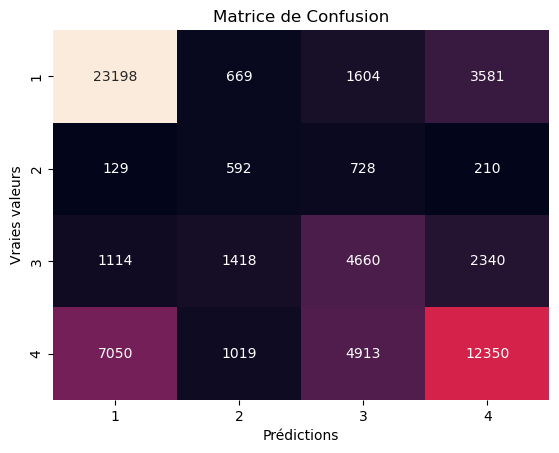

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score

y_pred_balanced = model_balanced.predict(X_test)
y_pred_train_balanced = model_balanced.predict(X_train_balanced)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_balanced))
print('Accuracy score train :', accuracy_score(y_train_balanced, y_pred_train_balanced))
print('Recall test :', recall_score(y_test, y_pred_balanced, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred_balanced, average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred_balanced)

display(pd.crosstab(y_test, y_pred_balanced, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_balanced))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model_balanced.classes_,
            yticklabels=model_balanced.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();

In [185]:
from sklearn.ensemble import RandomForestClassifier

model_balanced2 = RandomForestClassifier(n_estimators=500, 
                                        max_depth=None,
                                        min_samples_split = 11,
                                        min_samples_leaf = 5,
                                        random_state=42)
model_balanced2.fit(X_train_balanced2, y_train_balanced2)

# Mesure performance modèle
print('Score test :', model_balanced2.score(X_test, y_test))
print('Score train :', model_balanced2.score(X_train_balanced2, y_train_balanced2))

Score test : 0.6205566145634769
Score train : 0.748149305013275


Accuracy score test : 0.6205566145634769
Accuracy score train : 0.748149305013275
Recall test : 0.5355536174934288
f1 score test : 0.49620403801790436


Prédiction,1,2,3,4
Réalité,,,,
1,23173,697,1653,3529
2,134,616,712,197
3,1115,1451,4676,2290
4,7085,1096,4923,12228


              precision    recall  f1-score   support

           1       0.74      0.80      0.77     29052
           2       0.16      0.37      0.22      1659
           3       0.39      0.49      0.44      9532
           4       0.67      0.48      0.56     25332

    accuracy                           0.62     65575
   macro avg       0.49      0.54      0.50     65575
weighted avg       0.65      0.62      0.62     65575



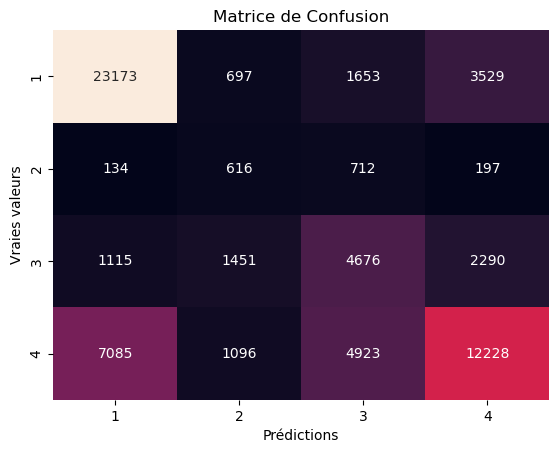

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, f1_score, accuracy_score

y_pred_balanced2 = model_balanced2.predict(X_test)
y_pred_train_balanced2 = model_balanced2.predict(X_train_balanced2)

# Mesure performance modèle
print('Accuracy score test :', accuracy_score(y_test, y_pred_balanced2))
print('Accuracy score train :', accuracy_score(y_train_balanced2, y_pred_train_balanced2))
print('Recall test :', recall_score(y_test, y_pred_balanced2, average='macro'))
print('f1 score test :', f1_score(y_test, y_pred_balanced2, average='macro'))

conf_matrix = confusion_matrix(y_test, y_pred_balanced2)

display(pd.crosstab(y_test, y_pred_balanced2, rownames=['Réalité'], colnames=['Prédiction']))
print(classification_report(y_test, y_pred_balanced2))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=model_balanced2.classes_,
            yticklabels=model_balanced2.classes_)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show();